In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = 'processed_csv/'
name = '_processed.csv'
def import_csv(battery_id, ambient_temp):
    dataframe = pd.read_csv((filepath+battery_id+name), index_col = 0)
    dataframe['cell'] = battery_id
    dataframe['ambient_temp'] = ambient_temp
    return dataframe

In [3]:
battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']
dataframes_24 = []
for battery_id in battery_ids:
    dataframes_24.append(import_csv(battery_id, 24))

In [4]:
df_temp_24 = pd.concat(dataframes_24)
df_temp_24.reset_index(inplace=True)
df_temp_24.drop(["index"], axis=1, inplace=True)
df_temp_24.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)

In [5]:
battery_ids = ['B0049', 'B0050', 'B0051', 'B0053', 'B0054', 'B0055', 'B0056']
dataframes_4 = []
for battery_id in battery_ids:
    dataframes_4.append(import_csv(battery_id, 4))


In [6]:
df_temp_4 = pd.concat(dataframes_4)
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(["index"], axis=1, inplace=True)
df_temp_4.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)
df_temp_4

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
0,1473.328,16.270513,0.007276,1217.453,-0.000205,988.563,0.858373,B0049,4
1,2291.062,13.741555,0.008361,2234.437,-0.000414,101.656,1.420906,B0049,4
2,2297.109,13.429040,0.007559,2240.031,-0.000571,101.172,1.372852,B0049,4
3,1769.031,14.962434,0.013949,3490.797,0.000369,1291.468,2.378644,B0049,4
4,2197.344,20.530530,0.009691,1589.719,-0.000628,1483.719,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
425,328.187,8.905384,0.007373,1828.187,-0.000570,107.250,1.130219,B0056,4
426,NaN,NaN,NaN,1730.437,-0.000521,107.968,1.125872,B0056,4
427,470.609,9.601768,0.006927,1799.062,-0.000531,684.313,1.143011,B0056,4
428,435.406,9.474135,0.007005,1812.281,-0.000524,110.094,1.137273,B0056,4


## Outlier Detection

In [7]:
df_temp_24.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,-0.509937,-0.938845,0.998900,0.951272,0.871524,0.997255,NaN
max_temp_D,-0.509937,1.000000,0.735812,-0.527029,-0.550087,-0.503261,-0.534157,NaN
slope_temp_D,-0.938845,0.735812,1.000000,-0.945828,-0.945628,-0.845329,-0.948982,NaN
time_voltage_measured_below3_D,0.998900,-0.527029,-0.945828,1.000000,0.955940,0.873168,0.999098,NaN
slope_voltage_measured_D,0.951272,-0.550087,-0.945628,0.955940,1.000000,0.845816,0.956260,NaN
time_for_max_temp_C,0.871524,-0.503261,-0.845329,0.873168,0.845816,1.000000,0.869963,NaN
capacity,0.997255,-0.534157,-0.948982,0.999098,0.956260,0.869963,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 24.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


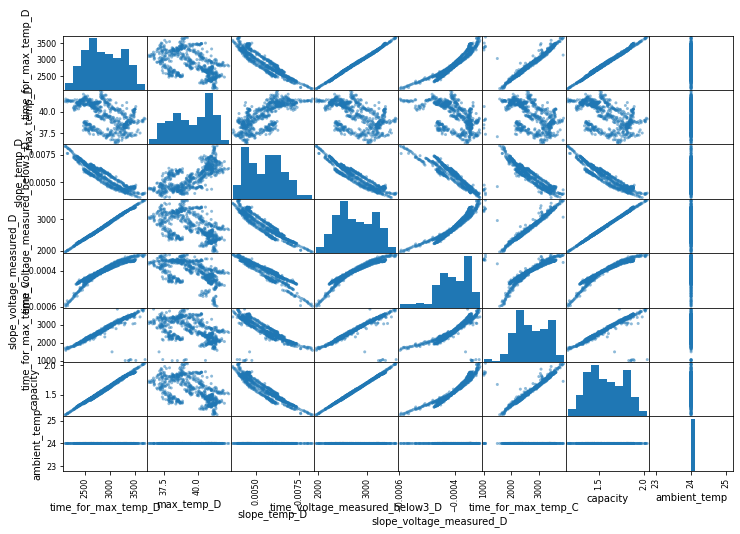

In [8]:
from pandas.plotting import scatter_matrix

attributes = df_temp_24.columns
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

In [9]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.03, warm_start=True)
outlier_locs = clf.fit_predict(df_temp_24[['time_for_max_temp_C', 'capacity']])  # fit the added trees 
print(outlier_locs)

[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [10]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
indices

[0,
 31,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 199,
 331,
 332,
 333,
 334,
 336,
 367,
 504,
 549,
 559]

In [11]:
df_temp_24.drop(indices, inplace=True)

In [12]:
df_temp_24

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,B0005,24
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,B0005,24
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,B0005,24
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,B0005,24
5,3329.047,38.751695,0.004274,3250.203,-0.000340,3422.047,1.835662,B0005,24
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,2217.719,1.362737,B0018,24
632,2487.563,38.802834,0.005931,2377.500,-0.000462,2199.828,1.363405,B0018,24
633,2481.078,38.726991,0.006112,2343.109,-0.000463,2165.250,1.351865,B0018,24
634,2500.703,38.671920,0.006106,2348.656,-0.000465,2195.156,1.354797,B0018,24


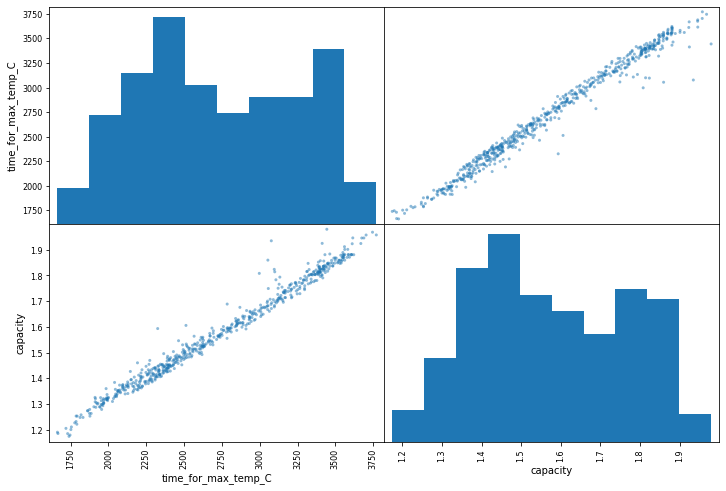

In [13]:
attributes = ['time_for_max_temp_C', 'capacity']
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

In [14]:
df_temp_4.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,0.809569,0.213456,-0.034824,0.100198,0.361708,-0.046922,NaN
max_temp_D,0.809569,1.000000,0.333342,-0.221409,-0.112564,0.275371,-0.045700,NaN
slope_temp_D,0.213456,0.333342,1.000000,-0.076486,-0.143095,0.086473,-0.055517,NaN
time_voltage_measured_below3_D,-0.034824,-0.221409,-0.076486,1.000000,0.327741,-0.146835,0.966607,NaN
slope_voltage_measured_D,0.100198,-0.112564,-0.143095,0.327741,1.000000,0.147687,-0.126335,NaN
time_for_max_temp_C,0.361708,0.275371,0.086473,-0.146835,0.147687,1.000000,-0.189824,NaN
capacity,-0.046922,-0.045700,-0.055517,0.966607,-0.126335,-0.189824,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


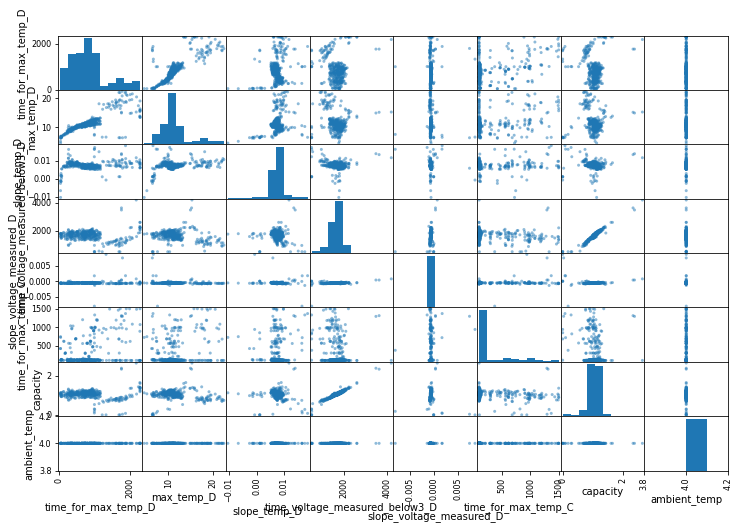

In [15]:
from pandas.plotting import scatter_matrix

attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

In [16]:
df_temp_4 = pd.concat(dataframes_4)
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(["index"], axis=1, inplace=True)
df_temp_4.drop(['remaining_cycles','max_temp_C', 'time_for_max_temp_C'], axis=1, inplace=True)
df_temp_4.dropna(inplace=True)
df_temp_4.reset_index(inplace=True)
df_temp_4

,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,4
1,1,2291.062,13.741555,0.008361,2234.437,-0.000414,1.420906,B0049,4
2,2,2297.109,13.429040,0.007559,2240.031,-0.000571,1.372852,B0049,4
3,3,1769.031,14.962434,0.013949,3490.797,0.000369,2.378644,B0049,4
4,4,2197.344,20.530530,0.009691,1589.719,-0.000628,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
350,424,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
351,425,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
352,427,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
353,428,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


In [17]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.1, warm_start=True)
outlier_locs = clf.fit_predict(df_temp_4[['time_for_max_temp_D','max_temp_D','slope_temp_D', 'time_voltage_measured_below3_D', 'slope_voltage_measured_D','capacity']])  # fit the added trees 
print(outlier_locs)

[ 1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1
 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1

In [18]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
df_temp_4.drop(indices, inplace=True)
df_temp_4.corr()


,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp
index,1.000000,-0.440258,-0.596155,-0.384881,0.648950,0.547121,0.603531,NaN
time_for_max_temp_D,-0.440258,1.000000,0.931331,0.141879,-0.330186,-0.124684,-0.287888,NaN
max_temp_D,-0.596155,0.931331,1.000000,0.311078,-0.516259,-0.303605,-0.483796,NaN
slope_temp_D,-0.384881,0.141879,0.311078,1.000000,-0.175839,-0.190047,-0.218963,NaN
time_voltage_measured_below3_D,0.648950,-0.330186,-0.516259,-0.175839,1.000000,0.633754,0.959434,NaN
slope_voltage_measured_D,0.547121,-0.124684,-0.303605,-0.190047,0.633754,1.000000,0.691921,NaN
capacity,0.603531,-0.287888,-0.483796,-0.218963,0.959434,0.691921,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


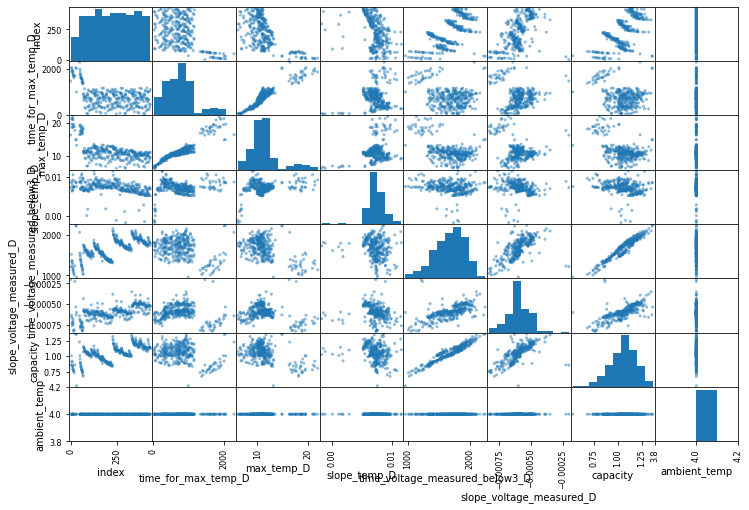

In [19]:
attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

# Categorical Features

In [24]:
df_all = pd.concat([df_temp_24, df_temp_4])
df_all.drop(['time_for_max_temp_C', 'index'], axis = 1, inplace=True)
df_onehot = pd.get_dummies(df_all.ambient_temp, prefix='ambient_temp')
df_all = df_all.join(df_onehot)
df_all.drop(['ambient_temp'], axis =1, inplace=True)

In [25]:
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24
0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,1,0
1,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,0,1
2,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,0,1
3,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,0,1
4,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,0,1
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,1.362737,B0018,0,1
632,2487.563,38.802834,0.005931,2377.500,-0.000462,1.363405,B0018,0,1
633,2481.078,38.726991,0.006112,2343.109,-0.000463,1.351865,B0018,0,1
634,2500.703,38.671920,0.006106,2348.656,-0.000465,1.354797,B0018,0,1


In [26]:
df_all.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
time_for_max_temp_D,1.000000,0.941078,-0.578300,0.887670,0.821301,0.872908,-0.187193,0.187193
max_temp_D,0.941078,1.000000,-0.445561,0.796262,0.750056,0.771333,-0.173048,0.173048
slope_temp_D,-0.578300,-0.445561,1.000000,-0.701064,-0.662628,-0.713903,0.132968,-0.132968
time_voltage_measured_below3_D,0.887670,0.796262,-0.701064,1.000000,0.926302,0.996108,-0.185901,0.185901
slope_voltage_measured_D,0.821301,0.750056,-0.662628,0.926302,1.000000,0.933261,-0.167615,0.167615
capacity,0.872908,0.771333,-0.713903,0.996108,0.933261,1.000000,-0.179262,0.179262
ambient_temp_4,-0.187193,-0.173048,0.132968,-0.185901,-0.167615,-0.179262,1.000000,-1.000000
ambient_temp_24,0.187193,0.173048,-0.132968,0.185901,0.167615,0.179262,-1.000000,1.000000


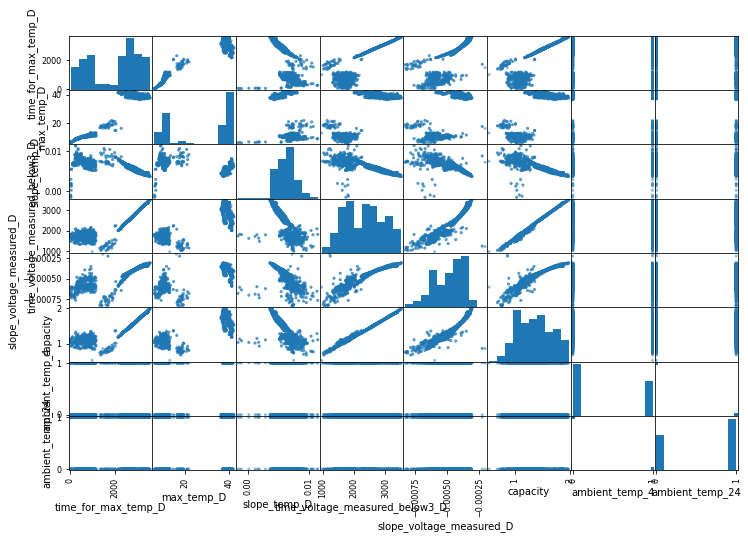

In [27]:
attributes = df_all.columns
scatter_matrix(df_all[attributes], figsize=(12,8))
plt.show()

In [ ]:
pd.pivot_table(df_all, values = 'capacity', index = ['ambient_temp'], columns=['cell'])

In [29]:
pd.pivot_table(df_all, values = 'time_voltage_measured_below3_D', index = ['ambient_temp'], columns=['cell'])

cell,B0005,B0006,B0007,B0018,B0049,B0050,B0051,B0053,B0054,B0055,B0056
ambient_temp,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,1271.1176,1808.645667,1307.54215,1571.795976,1532.031575,1801.909203,1893.710827
24,2748.05262,2677.075323,2916.393151,2727.638318,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
i = df_all[df_all.cell == 'B0050'].index
df_all.drop(i, inplace=True)

## Train/Val/Test Split

In [30]:
from sklearn.model_selection import train_test_split
df_train, df_val_test = train_test_split(df_all, test_size=0.4, random_state=42, stratify=df_all[['cell']])

In [31]:
print(len(df_train), len(df_val_test))

916 612


In [32]:
df_train.cell.value_counts()

B0006    184
B0005    176
B0007    110
B0055     95
B0056     95
B0054     91
B0018     78
B0053     49
B0051     23
B0049     15
Name: cell, dtype: int64

In [33]:
df_train.drop(['cell'], axis = 1, inplace=True)

/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
230,897.390,11.314102,0.006747,1785.422,-0.000473,1.086437,1,0
439,2922.438,41.897532,0.005860,2787.016,-0.000398,1.574979,0,1
350,3430.156,39.461397,0.004486,3330.219,-0.000347,1.859362,1,0
202,303.562,8.861449,0.009529,1861.484,-0.000627,1.098464,1,0
351,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,1,0
...,...,...,...,...,...,...,...,...
343,232.344,8.054796,0.006561,1762.625,-0.000616,1.076822,0,1
122,994.094,12.545498,0.007477,1653.531,-0.000597,1.015339,1,0
61,1342.844,16.850133,0.007492,1129.453,-0.000820,0.739180,1,0
59,1434.704,17.545176,0.007328,1170.266,-0.000825,0.760529,0,1


In [35]:
df_val_test.cell.value_counts()

B0006    122
B0005    118
B0007     74
B0055     64
B0056     64
B0054     61
B0018     51
B0053     33
B0051     15
B0049     10
Name: cell, dtype: int64

In [36]:
df_val, df_test = train_test_split(df_val_test, test_size=0.5, random_state=42, stratify=df_val_test[['cell']])

In [37]:
df_val.drop(['cell'], axis = 1, inplace=True)
df_test.drop(['cell'], axis = 1, inplace=True)

/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
X_train_num = df_train.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_train_cat = df_train[['ambient_temp_4', 'ambient_temp_24']]
y_train = df_train.capacity
X_val_num = df_val.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_val_cat = df_val[['ambient_temp_4', 'ambient_temp_24']]
y_val = df_val.capacity
X_test_num = df_test.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_test_cat = df_test[['ambient_temp_4', 'ambient_temp_24']]
y_test = df_test.capacity

## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

# Temperature can be scaled even though it is a categorical variable, as we only have two discrete values
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num = scaler.transform(X_test_num)
X_val_scaled_num = scaler.transform(X_val_num)

In [49]:
#Combining numerical and categorical x data:
X_train_scaled = np.concatenate((X_train_scaled_num, X_train_cat.to_numpy()), axis=1)
X_val_scaled = np.concatenate((X_val_scaled_num, X_val_cat.to_numpy()), axis=1)
X_test_scaled = np.concatenate((X_test_scaled_num, X_test_cat.to_numpy()), axis=1)

In [50]:
X_train_scaled

array([[-1.02456362, -1.20578882,  0.32219604, ...,  0.10460848,
         1.        ,  0.        ],
       [ 0.82704145,  0.96421937, -0.25419666, ...,  0.74152072,
         0.        ,  1.        ],
       [ 1.29127402,  0.79136651, -1.14578569, ...,  1.1706538 ,
         1.        ,  0.        ],
       ...,
       [-0.61726222, -0.81298683,  0.80542192, ..., -2.84104018,
         1.        ,  0.        ],
       [-0.53326992, -0.7636709 ,  0.69909507, ..., -2.89050379,
         0.        ,  1.        ],
       [-1.0999537 , -1.24046324,  0.12734029, ..., -0.90294712,
         0.        ,  1.        ]])

## Model Selection

In [55]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

We perform an initial test using default hyperparameters with all the regressors.

In [60]:
forest_reg = RandomForestRegressor(random_state=42)
extra_reg = ExtraTreesRegressor(random_state=42)
lin_reg = LinearRegression()
elastic_reg = ElasticNet(random_state=42)
lgbm_reg = LGBMRegressor(random_state=42)
xgb_reg = XGBRegressor()
svm_reg = SVR(kernel='linear')


In [61]:
regressor_list = [forest_reg, extra_reg, lin_reg, elastic_reg, lgbm_reg, xgb_reg, svm_reg]
regressor_names = ['random forest', 'extra trees', 'linear regression', 'elastic net', 'lgbm', 'xgb', 'svm']
for regressor, name in zip(regressor_list, regressor_names):
    cv = cross_val_score(regressor, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-cv)
    print('name:{}, scores:{}, mean:{}'.format(name, rmse_scores, rmse_scores.mean()))

name:random forest, scores:[0.01736151 0.01584289 0.0145678  0.01401126 0.01387529], mean:0.0151317514136052
name:extra trees, scores:[0.01461349 0.01270199 0.01312681 0.01290909 0.00886028], mean:0.01244233256574923
name:linear regression, scores:[0.02658241 0.02007913 0.02266414 0.02189564 0.01918037], mean:0.022080339493039603
name:elastic net, scores:[0.30291874 0.29496136 0.28120346 0.3281829  0.3191615 ], mean:0.30528559233445574
name:lgbm, scores:[0.01402497 0.01531097 0.01500306 0.01516561 0.01762464], mean:0.01542585040763178
name:xgb, scores:[0.01352284 0.01622546 0.01471349 0.01365445 0.01537325], mean:0.014697897358749545
name:svm, scores:[0.04306198 0.038889   0.04248703 0.0405623  0.04700649], mean:0.04240136178939051


In [54]:
forest_reg.fit(X_train_scaled, y_train)
feature_importances = forest_reg.feature_importances_
feature_names = X_train.columns
for importance, name in zip(feature_importances, feature_names):
    print('name:{}, importance:{}'.format(name, importance))

name:time_for_max_temp_D, importance:0.2561774729722894
name:max_temp_D, importance:0.0006750359334775009
name:slope_temp_D, importance:0.0012272874501128698
name:time_voltage_measured_below3_D, importance:0.7379983034821812
name:slope_voltage_measured_D, importance:0.0038909184863708465
name:ambient_temp_4, importance:1.7197623298397082e-05
name:ambient_temp_24, importance:1.3784052269740225e-05


## Hyperparameter Tuning

Based on our initial analysis, it appears as though the forest and gradient-boosting based regressors performed the best. We'll tune these further.

### Random Forest

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [80]:
rf_random.best_params_
# RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [79]:
from sklearn.metrics import mean_squared_error

def evaluate(model, val_features, val_labels):
    predictions = model.predict(val_features)
    errors = np.sqrt(mean_squared_error(val_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.10f} Ah'.format(errors))

base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = rf_random.best_estimator_
evaluate(best_random, X_val_scaled, y_val)


Model Performance
Average Error: 0.0176542196 Ah
Model Performance
Average Error: 0.0175958132 Ah


In [81]:
#Further narrow down using grid search

n_estimators = [1300, 1350, 1400, 1450, 1500]
max_features = [6, 7]
max_depth = [90, 100, 110]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [82]:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator = rf, param_grid =param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  4.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [6, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1300, 1350, 1400, 1450, 1500]},
             verbose=2)

In [83]:
rf_grid.best_params_
'''
{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}
'''

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}

In [84]:
grid_rf = rf_grid.best_estimator_
evaluate(grid_rf, X_val_scaled, y_val)


Model Performance
Average Error: 0.0173558835 Ah


## Extra Trees

In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [86]:
et = ExtraTreesRegressor(random_state=42)
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, verbose=2, n_jobs = -1)
et_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   42.1s finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [87]:
et_random.best_estimator_
# ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

In [88]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = et_random.best_estimator_
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0156984448 Ah
Model Performance
Average Error: 0.0154873928 Ah


In [89]:
n_estimators = [1600, 1700, 1750, 1800, 1850, 1900, 2000]
max_features = [4, 5, 6, 7]
max_depth = [10, 15, 20, 25, 30, 40]
min_samples_split = [2]
min_samples_leaf = [1, 2]
bootstrap = [True]
et_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [90]:
et_grid = GridSearchCV(estimator = et, param_grid =et_grid, cv = 3, verbose=2, n_jobs = -1)
et_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  5.0min finished


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 15, 20, 25, 30, 40],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [1600, 1700, 1750, 1800, 1850, 1900,
                                          2000]},
             verbose=2)

In [91]:
et_grid.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [93]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = et_grid.best_estimator_
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0156984448 Ah
Model Performance
Average Error: 0.0165070939 Ah


### lgbm